In [11]:
# Importing necessary libraries
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib as plt


In [12]:
# Reading Train and Test Data
X = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [16]:
# Viewing and understanding the dataset
X.describe()
X.shape
X.info()
X.head()
X.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
# Store the target in another variable
y = X.pop('Survived')
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
# Store the umeric columns for using in the model
num_columns = list(X.dtypes[X.dtypes != 'object'].index)
X[num_columns].head()

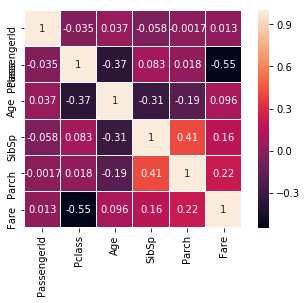

In [20]:
# Creating heatmap to understand the relation
sns.heatmap(X[num_columns].corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)

In [22]:
# Checking for nulls in dataset
X.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
# Substituing the nulls in the age column with mean
X.loc[X.Age.isnull(),'Age'] = X[~X.Age.isnull()].Age.mean()

In [24]:
X[num_columns].head()
X[num_columns].tail()
#X.Cabin.value_counts()
X[num_columns].isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [25]:
# Building and trining the RandomForestClassifier model
model = RandomForestClassifier(max_depth = 30,n_estimators=100)
model.fit(X[num_columns],y)
accuracy_score(y , model.predict(X[num_columns]))

1.0

In [26]:
# Cleaning our test dataset and running the model on it
test.loc[test.Age.isnull(),'Age'] = test[~test.Age.isnull()].Age.mean()
test.loc[test.Fare.isnull(),'Fare'] = 35.62
pred = model.predict(test[num_columns])
pred.sum()

143

In [29]:
#Storing the prediction in csv
submit = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : pred
})
submit.to_csv('Prediction.csv',index=False)